# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 39.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=e8802a5e572d6abe0762f11fbb3289d2e7eaee424e75d9e6f8ffdb3fd5dc4c41
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [2]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-3. 한글 글꼴 설정(Windows)

In [4]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [5]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (58.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [89]:
# FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
# print(font_name)
# plt.rcParams['font.family']=font_name
# assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [6]:
train = pd.read_csv('/content/drive/MyDrive/2023/AIVLE/NLP미프/2023.04.03_미니프로젝트4차_실습자료/train.csv')

### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [7]:
train.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


In [8]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [9]:
X = train.text #training 데이터에서 문서 추출
y = train.label #training 데이터에서 라벨 추출

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

In [ ]:
str_len_mean = np.mean(train['text'].str.len()) # 리뷰 길이의 평균값 계산
print('평균 길이 :',round(str_len_mean))

In [ ]:
str_len_max = np.max(train['text'].str.len()) # 리뷰 길이의 평균값 계산
print('최대 길이 :',round(str_len_max))

In [ ]:
str_len_min = np.min(train['text'].str.len()) # 리뷰 길이의 평균값 계산
print('최소 길이 :',round(str_len_min))

In [ ]:
print('-'*120)
text_length = train.text.str.len()
print(' 최대 길이 : ', train.text[text_length.argmax()], text_length.argmax())  ##argmax 인덱스 번호
print(' 최소 길이 : ', train.text[text_length.argmin()], text_length.argmin())  ##argmin 인덱스 번호
plt.figure(figsize = (12,8))
plt.subplot(2,1,1, title = 'max string length:' + str(max(text_length)))
sns.histplot(text_length, bins = 50)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x=text_length)
plt.grid()
plt.show()

### target 분포

In [14]:
train['label'].value_counts() 

코드2       1097
웹          732
이론         728
시스템 운영     561
코드1        488
원격         100
Name: label, dtype: int64

In [15]:
val_count = train['label'].value_counts() # 유니크값의 개수를 확인합니다.

for i in range(0,5):
  print(f'라벨 "{val_count.index[i]}" 데이터 개수 :', val_count[i])

라벨 "코드2" 데이터 개수 : 1097
라벨 "웹" 데이터 개수 : 732
라벨 "이론" 데이터 개수 : 728
라벨 "시스템 운영" 데이터 개수 : 561
라벨 "코드1" 데이터 개수 : 488


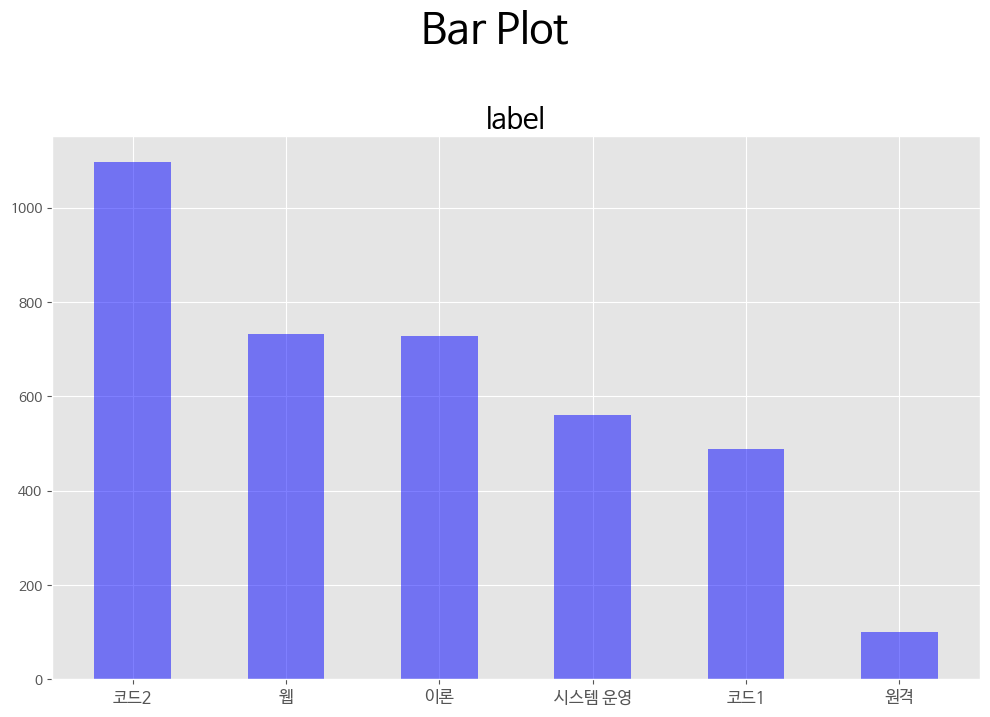

In [16]:
%matplotlib inline
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = train['label']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Bar Plot", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('label', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [10]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
import pickle
from nltk.corpus import stopwords
from os import path
#nltk.download('all')

In [11]:
from konlpy.tag import Okt 

okt = Okt() # 인스턴스 할당
mecab = MeCab()

In [19]:
han_sentence = "오늘도 열심히 코딩을 해볼까요? 같이 힘내서 자연어 처리 고수가 됩시다! ㅎㅎ"
okt = Okt() # 인스턴스 할당
print("한국어 형태소 분석 결과(어간 추출X) ==>", okt.morphs(han_sentence, stem = False)) # 형태소 단위로 분리
print("한국어 형태소 분석 결과(어간 추출O) ==>", okt.morphs(han_sentence, stem = True)) # 형태소 단위로 분리 후 어간 추출

한국어 형태소 분석 결과(어간 추출X) ==> ['오늘', '도', '열심히', '코딩', '을', '해볼까', '요', '?', '같이', '힘내서', '자연어', '처리', '고수', '가', '됩시다', '!', 'ㅎㅎ']
한국어 형태소 분석 결과(어간 추출O) ==> ['오늘', '도', '열심히', '코딩', '을', '해보다', '요', '?', '같이', '힘내다', '자연어', '처리', '고수', '가', '되다', '!', 'ㅎㅎ']


In [20]:
if 'okt_morphs' not in globals():
    %time okt_morphs = train.text.apply(lambda  x : okt.morphs(str(x))) #형태소
    %time okt_nouns = train.text.apply(lambda  x : okt.nouns(str(x))) #명사
    %time okt_pos = train.text.apply(lambda  x : okt.pos(str(x),norm=True,stem=True,join=True)) #POS 태깅

CPU times: user 43.2 s, sys: 351 ms, total: 43.5 s
Wall time: 37.4 s
CPU times: user 31 s, sys: 90.3 ms, total: 31.1 s
Wall time: 30.6 s
CPU times: user 57.1 s, sys: 243 ms, total: 57.4 s
Wall time: 53.8 s


In [21]:
okt_morphs

0       [self, ., convs, 1, =, nn, ., ModuleList, ([, ...
1       [현재, 이미지, 를, 여러, 개, 업로드, 하기, 위해, 자바스크립트, 로, 동,...
2       [glob, ., glob, (, PATH, ), 를, 사용, 할, 때, 질문, 입...
3       [tmpp, =, tmp, ., groupby, (, by, =, ', Addr, ...
4       [filename, =, TEST, _, IMAGE, +, str, (, round...
                              ...                        
3701    [토큰, 화, 이후, train, val, 를, 분리, 하고, 각, train, s...
3702    [올린, 값, 들, 중, 최고점, 인, 건가, 요, ?, 아니면, 최근, 에, 올린...
3703    [수업, 에서, cacoo, 랑, packet, tracer, 를, 배우는, 이유,...
3704    [inplace, =, True, 해도, 값, 이, 변경, 이, 안되고, none,...
3705    [상관관계, 는, 그렇게, 크지, 않게, 나오는데, p, -, value, 값, 은...
Name: text, Length: 3706, dtype: object

In [22]:
def mecab_tokenizer(string):
    return list("/".join(res) for res in mecab.pos(str(string)))

In [23]:
if 'morphs' not in globals():
    %time morphs = train.text.apply(lambda  x : mecab.morphs(str(x)))
    %time nouns = train.text.apply(lambda  x : mecab.nouns(str(x)))
    %time pos_tuple = train.text.apply(lambda  x : mecab.pos(str(x)))
    %time pos = train.text.apply(mecab_tokenizer)

CPU times: user 3.19 s, sys: 55 ms, total: 3.25 s
Wall time: 3.26 s
CPU times: user 4.73 s, sys: 17 ms, total: 4.74 s
Wall time: 4.81 s
CPU times: user 3.57 s, sys: 65.3 ms, total: 3.64 s
Wall time: 3.65 s
CPU times: user 3.35 s, sys: 40.4 ms, total: 3.39 s
Wall time: 3.38 s


In [24]:
okt_pos

0       [self/Alpha, ./Punctuation, convs/Alpha, 1/Num...
1       [현재/Noun, 이미지/Noun, 를/Josa, 여러/Modifier, 개/Nou...
2       [glob/Alpha, ./Punctuation, glob/Alpha, (/Punc...
3       [tmpp/Alpha, =/Punctuation, tmp/Alpha, ./Punct...
4       [filename/Alpha, =/Punctuation, TEST/Alpha, _/...
                              ...                        
3701    [토큰/Noun, 화/Suffix, 이후/Noun, train/Alpha, val/...
3702    [올리다/Verb, 값/Noun, 들/Suffix, 중/Noun, 최고점/Noun,...
3703    [수업/Noun, 에서/Josa, cacoo/Alpha, 랑/Josa, packet...
3704    [inplace/Alpha, =/Punctuation, True/Alpha, 해도/...
3705    [상관관계/Noun, 는/Josa, 그렇게/Adverb, 크다/Verb, 않다/Ve...
Name: text, Length: 3706, dtype: object

In [25]:
pos

0       [self/SL, ./SY, convs/SL, 1/SN, =/SY, nn/SL, ....
1       [현재/MAG, 이미지/NNG, 를/JKO, 여러/MM, 개/NNBC, 업로드/NN...
2       [glob/SL, ./SY, glob/SL, (/SSO, PATH/SL, )/SSC...
3       [tmpp/SL, =/SY, tmp/SL, ./SY, groupby/SL, (/SS...
4       [filename/SL, =/SY, TEST/SL, _/SY, IMAGE/SL, +...
                              ...                        
3701    [토큰/NNG, 화/XSN, 이후/NNG, train/SL, val/SL, 를/JK...
3702    [올린/VV+ETM, 값/NNG, 들/XSN, 중/NNB, 최고점/NNG, 인/VC...
3703    [수업/NNG, 에서/JKB, cacoo/SL, 랑/JC, packet/SL, tr...
3704    [inplace/SL, =/SY, True/SL, 해도/VV+EC, 값/NNG, 이...
3705    [상관/NNG, 관계/NNG, 는/JX, 그렇게/MAG, 크/VA, 지/EC, 않/...
Name: text, Length: 3706, dtype: object

In [26]:
# 샘플의 수 / 샘플당 단어의 수
print('샘플의 수 / 샘플당 단어의 수 : ' , len(pos)/pos.apply(len).mean()) 
print('샘플의 수 : ', len(pos) ) # 샘플의 수
print('샘플 하나 당 단어의 수 (평균) : ', pos.apply(len).mean()) #  샘플당 단어의 수 

샘플의 수 / 샘플당 단어의 수 :  46.16679215855003
샘플의 수 :  3706
샘플 하나 당 단어의 수 (평균) :  80.27415002698326


In [27]:
morphs.apply(len).mean()

80.27415002698326

In [28]:
pos

0       [self/SL, ./SY, convs/SL, 1/SN, =/SY, nn/SL, ....
1       [현재/MAG, 이미지/NNG, 를/JKO, 여러/MM, 개/NNBC, 업로드/NN...
2       [glob/SL, ./SY, glob/SL, (/SSO, PATH/SL, )/SSC...
3       [tmpp/SL, =/SY, tmp/SL, ./SY, groupby/SL, (/SS...
4       [filename/SL, =/SY, TEST/SL, _/SY, IMAGE/SL, +...
                              ...                        
3701    [토큰/NNG, 화/XSN, 이후/NNG, train/SL, val/SL, 를/JK...
3702    [올린/VV+ETM, 값/NNG, 들/XSN, 중/NNB, 최고점/NNG, 인/VC...
3703    [수업/NNG, 에서/JKB, cacoo/SL, 랑/JC, packet/SL, tr...
3704    [inplace/SL, =/SY, True/SL, 해도/VV+EC, 값/NNG, 이...
3705    [상관/NNG, 관계/NNG, 는/JX, 그렇게/MAG, 크/VA, 지/EC, 않/...
Name: text, Length: 3706, dtype: object

### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [29]:
nouns.explode()

0        여기
0        커널
0       사이즈
0         은
0        단어
       ... 
3705     관계
3705      값
3705     관련
3705     경우
3705     해석
Name: text, Length: 57052, dtype: object

In [30]:
%%time
nltk_nouns = nltk.Text(nouns.explode())
nltk_nouns = nltk.Text([w for w in nltk_nouns if isinstance(w,str)])
nltk_morphs = nltk.Text(morphs.explode())
nltk_morphs = nltk.Text([w for w in nltk_morphs if isinstance(w,str)])
nltk_pos = nltk.Text(pos.explode())
nltk_pos_tuple = nltk.Text(pos_tuple.explode())


CPU times: user 219 ms, sys: 9.03 ms, total: 228 ms
Wall time: 229 ms


In [31]:
nltk_pos_tuple

<Text: ('self', 'SL') ('.', 'SY') ('convs', 'SL') ('1', 'SN') ('=', 'SY') ('nn', 'SL') ('.', 'SY') ('ModuleList', 'SL')...>

In [32]:
nltk_nouns

<Text: 여기 커널 사이즈 은 단어 최대 길이 가정...>

In [33]:
display(nltk_nouns.vocab())
print('단어수 : ', len(nltk_nouns.vocab()))

FreqDist({'것': 1093, '수': 986, '값': 801, '데이터': 783, '문제': 725, '때': 714, '코드': 712, '실습': 609, '번': 596, '파일': 581, ...})

단어수 :  3423


In [34]:
nltk_nouns.vocab()

FreqDist({'것': 1093, '수': 986, '값': 801, '데이터': 783, '문제': 725, '때': 714, '코드': 712, '실습': 609, '번': 596, '파일': 581, ...})

In [35]:
len(nltk_nouns.tokens)

57025

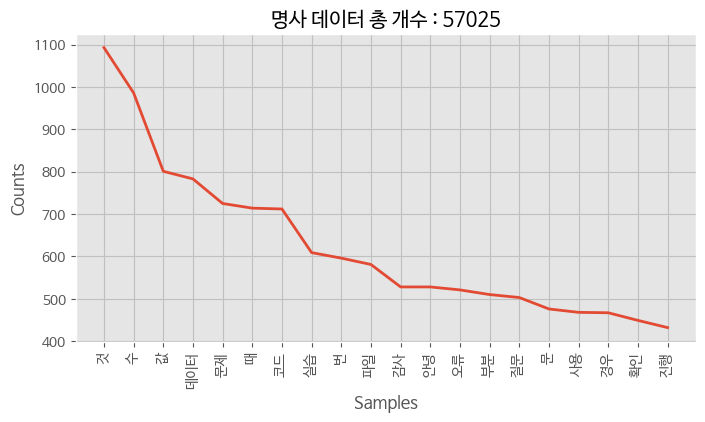

In [36]:
plt.figure(figsize=(8,4))
plt.title('명사 데이터 총 개수 : '+ str(len(nltk_nouns.tokens)))
nltk_nouns.plot(20)
plt.show()

In [37]:
display(nltk_pos.vocab())
print('단어수 : ', len(nltk_pos.vocab()))

FreqDist({'(/SSO': 6450, ',/SC': 6342, '-/SY': 5845, './SF': 5557, ')/SSC': 5517, '_/SY': 5425, './SY': 5226, '=/SY': 4081, '하/XSV': 3605, '가/JKS': 3373, ...})

단어수 :  11980


In [38]:
display(nltk_morphs.vocab())
print('단어수 : ', len(nltk_morphs.vocab()))

FreqDist({'.': 10783, '(': 6452, ',': 6362, '-': 5845, ')': 5668, '_': 5425, '하': 5410, '는': 4475, '이': 4155, '=': 4081, ...})

단어수 :  11066


In [39]:
len(set(nltk_nouns))/len(nltk_nouns)

0.060026304252520826

In [40]:
len(set(nltk_pos))/len(nltk_pos)

0.040269449000994974

### 색인

In [44]:
nltk_nouns.concordance('코드', lines = 10)
print("*"*100)
nltk_nouns.similar('코드')

Displaying 10 of 712 matches:
 업로드 자바 스크립트 동적 폼 개 생성 데 클릭 뭘 수 기본 예제 코드 이유 뭘까요 사용 때 질문 포함 작동 것 질문 제공 파일 폴더 포함
석 아래 가설 검증 방향 접근 방법 비 비 생각 첨부 파일 번 정답 코드 시 패스 출력 문제 요구 건 오답 경우 코드 것 웹 해킹 공부 리 
각 첨부 파일 번 정답 코드 시 패스 출력 문제 요구 건 오답 경우 코드 것 웹 해킹 공부 리 큰따옴표 따옴표 백 슬래시 데이터베이스 전달 
슬라이딩 퍼즐 문제 관련 질문 줄 처 숫자 빈칸 공백 입력 것 이해 코드 작성 초기 퍼즐 상태 이동 상태 저장 이동 상태 이동 횟수 저장 상
리 이동 완료 배열 대응 값 경우 이동한 상태 저장 이동 횟수 다음 코드 작성 예제 입력 정답 것 확인 채점 결과 테스트 케이스 결과 제 부
입력 정답 것 확인 채점 결과 테스트 케이스 결과 제 부분 생각 것 코드 문제 문 감사 강사 참조 자료 아래 강사 거 표 생성 위 자료 코드
코드 문제 문 감사 강사 참조 자료 아래 강사 거 표 생성 위 자료 코드 참조 작성 에러 위 에러 문구 안녕 선형 회귀 로지스틱 회귀 때 사
 저 정의 오류 부분 지 모델 생성 때 방법 설정 선언 걸까요 에러 코드 어디 건지 수 금요일 홈페이지 점검 내용 금일 접속 곳 접속 코딩 
후 부팅 동일 증상 문의 감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 
감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 액 식 차트 에러 데이터 
****************************************************************************************************
제 것 파일 값 번 실행 실습 문제 방법 문 수 오류 감사 위 발생 부분 에러 모델 함수 사용


In [45]:
nltk_nouns.concordance('오류', lines = 10)
print("*"*100)
nltk_nouns.similar('오류')

Displaying 10 of 521 matches:
 질문 포함 작동 것 질문 제공 파일 폴더 포함 폴더 안 정상 작동 오류 해결 안 폴더 안 이미지 저장 걸로 이해 실행 폴더 이미지 저장 질
 부분 부분 실행 파일 으로 생략 처음 데이터 열 때 옵션 적용 거 오류 걸까요 중간 원본 변경 걸까요 안녕 코딩 마스터스 에이 블러 코딩 
량 데 도움 진행 것 생각 감사 모델 예측 값 과정 옵티마 저 정의 오류 부분 지 모델 생성 때 방법 설정 선언 걸까요 에러 코드 어디 건지
용 금일 접속 곳 접속 코딩 마스터스 서버 접속 문 말씀 대로 이번 오류 발생 가능 원격 제어 운영 님 원격 문 글 오전 시간 얼마 실습 시
일 증상 문의 감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 액 식 차트
문의 감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 액 식 차트 에러 데
명 수 클라우드 문의 환경 세팅 완료 클라우드 에러 이전 과정 확인 오류 문 기능 헤드 부분 출력 바디 부분 출력 이거 해결 안녕 조 제출 
지 위 경우 그동안 문제 건지 문 전처리 부분 시간 관련 열 모델링 오류 기준일 열 형식 변경 해결 변수 가설 수립 때 변수 간 관계 이용 
수정 수 제출 파일 공백 파일 감사 더미 변수 생성 파트 이상 진행 오류 진행 진행 오류 나 뭐 문제 결과 첨부 마지막 안내 명령어 수행 에
일 공백 파일 감사 더미 변수 생성 파트 이상 진행 오류 진행 진행 오류 나 뭐 문제 결과 첨부 마지막 안내 명령어 수행 에러 메시지 원격 
****************************************************************************************************
에러 문제 것 코드 부분 수 사용 때 아래 시 해당 발생 질문 파일 이해 실행 출력 경우 위 값


In [49]:
nltk_nouns._word_context_index._word_to_contexts['코드']

FreqDist({('실습', '작성'): 12, ('다음', '작성'): 9, ('위', '실행'): 7, ('아래', '실행'): 5, ('에러', '발생'): 4, ('구', '도착'): 4, ('제', '다음'): 4, ('위', '결과'): 3, ('문제', '작성'): 3, ('방법', '작성'): 3, ...})

In [50]:
nltk_nouns.common_contexts(['코드', '오류'])

위_실행 위_오류 것_강의 위_부분 작성_위 때_것 다음_에러 작성_문제 다음_데이터 해당_실행


In [51]:
nltk_nouns._word_context_index.common_contexts(['코드', '오류'])

FreqDist({('위', '실행'): 2, ('위', '오류'): 2, ('것', '강의'): 2, ('위', '부분'): 2, ('작성', '위'): 2, ('때', '것'): 2, ('다음', '에러'): 2, ('작성', '문제'): 2, ('다음', '데이터'): 2, ('해당', '실행'): 2})

In [52]:
nltk_nouns.collocations(window_size=5)

데이터 프레임; 케이스 케이스; 라우팅 테이블; 인구수 인구수; 데이터 데이터; 충청북도 충청남도; 기준일 기준일; 테스트
케이스; 하이퍼 파라미터; 대구분 대구분; 리스트 리스트; 강원도 충청남도; 충청북도 강원도; 데이터 전처리; 문자열 문자열;
가중치 가중치; 주피터 노트북; 수원시 수원시; 홍길동 일지매; 충청남도 강원도


### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

In [55]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf']

In [58]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
#fm._rebuild()

NanumGothic


In [ ]:
# 그래프 시각화

top_10 = c.most_common(k) # 추출한 명사 중 상위 10개
keys = [top_10[i][0] for i in range(len(top_10))]
values = [top_10[i][1] for i in range(len(top_10))]

plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('total reviews', fontsize=20)
plt.bar(keys, values, width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

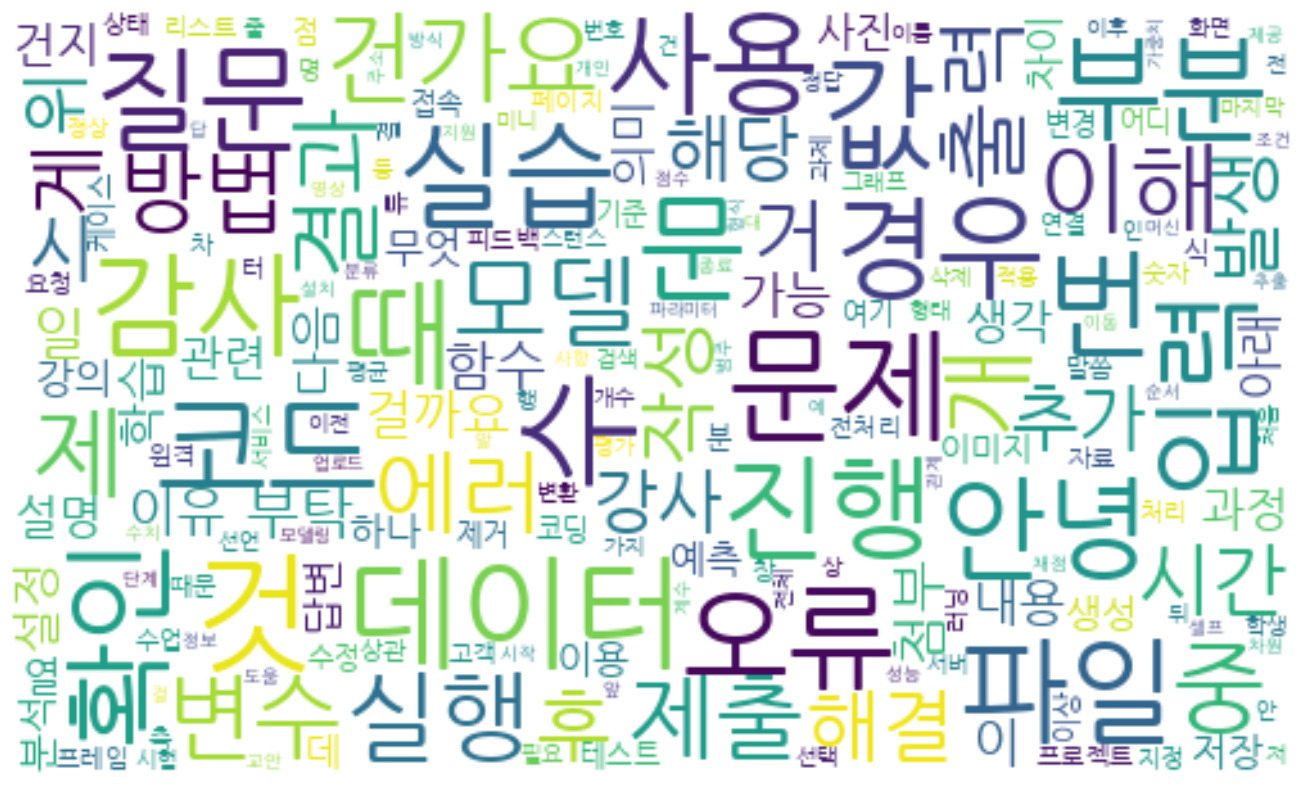

In [60]:
# 워드 클라우드
wordcloud = WordCloud(max_font_size=50, #가장 큰 폰트 크기 제한
                      width=500, #너비
                      height=300, #높이
                      background_color='white', #배경 색상
                      relative_scaling=.2, #상대적인 크기
                      font_path = font_name
                      ).generate_from_frequencies(nltk_nouns.vocab())

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    pass

### 4-2. 각각의 문의 유형에 대해 실행합니다.

In [ ]:
for label in sorted(train_df.label.unique()):
    text_analysis(train_df,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [13]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

preprocessed_df = train.replace({'label' : label_dict}).copy()

In [14]:
preprocessed_df

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0
...,...,...
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",0
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,3
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,2
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,4


### 5-2. Train Validation split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_df['text'], preprocessed_df['label'], test_size=0.3, random_state=42)



In [18]:
print( 'train 데이터 셋 모양 :', X_train.shape)
print( 'val 데이터 셋 모양 :', X_test.shape)

train 데이터 셋 모양 : (2594,)
val 데이터 셋 모양 : (1112,)


## 6. 데이터 처리

### DictVectorizer

서에서 단어의 사용 빈도를 나타내는 딕셔너리 정보를 입력받아 BOW 인코딩한 수치 벡터로 변환

In [16]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 1.]])

### CountVectorizer
CountVectorizer는 다음과 같은 세가지 작업을 수행한다.

문서를 토큰 리스트로 변환한다.

각 문서에서 토큰의 출현 빈도를 센다.

각 문서를 BOW 인코딩 벡터로 변환한다.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [25]:
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 

        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','', review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        corpus.append(review) 
        
    return corpus

In [28]:
X_train.values

array(['# nunique로 고유값의 갯수만 확인해볼게요\n\nbus_station_count = bus_station.groupby("자치구")["버스정류장ARS번호"].nunique()  # 집계\nbus_station_count\n\n이 코드 잘 이해가 안 가서 ㅠㅠ 설명해 주실 수 있나요!?',
       '계속 진행하고 있는데, 여기에서\ncount_vect = CountVectorizer()\nx_trainc = count_vect.fit_transform(train file)\nx_valc = count_vec.transform(val file)\ntrain file, val file에 어떤 것을 넣어야 될지 모르겠습니다.\n또한 이 데이터를 저장하는 방식도 알고 싶습니다.',
       'date를 기준으로 season이라는 새로운 범주형 변수를 만들고 싶은데요,\n어떻게 하면 그룹핑을 할 수 있을까요...?',
       ...,
       '혹시 내일 사용하는 데이터가 오늘과 겹치지 않는다면 오늘 다룬 데이터를 분석할때 강사님의 방식으로 전처리와 모델 학습을 하는 과정을 볼 수 있을까요?\n\n4시 55분 셀프 테스트 전까지 한번 쭉 정리해 주실 수 있으면 좋을 것 같습니다\n',
       "seoul_moving['start']=seoul_moving['출발 시군구 코드'].str.startwith(1)\n해당코드로 실행시 int값이다보니 str이 실행이 안되는데 어떻게 진행하면 되는지 알수 있을까요?",
       '오늘 강사님의 참조 파일은 언제 올려주시나요?!'], dtype=object)

In [30]:
#X_train = clean_text(X_train.values)

In [22]:
# temp = clean_text(train['text']) #메소드 적용
# train['text'] = temp
# print(train)

KeyError: ignored

### Dacon 전처리

In [ ]:
tokenized = [] # 데이터프레임의 한 컬럼으로 추가할 리스트
for sentence in train['text']: # 전처리된 리뷰들을 하나씩 꺼내옵니다
    tokens = nltk.word_tokenize(sentence)
    tokenize = " ".join(tokens) # tokens라는 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    tokenized.append(tokenize) # 형태소 단위로 띄어쓰기된 문자열을 최종 리스트에 추가해줍니다
train["tokenized_stem"] = pd.DataFrame(tokenized) # 리스트를 데이터프레임으로 변환해 tokenized_stem라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

In [ ]:
def postagging(dataframe):
    main_pos = [] # 데이터프레임의 새 컬럼이 될 리스트
    for sentence in dataframe['text']: # 리뷰들을 하나씩 가져옵니다
        pos = nltk.pos_tag(nltk.word_tokenize(sentence)) # 형태소 분석을 진행하고 해당 리스트를 pos라는 변수로 받습니다
        main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ('JJ', 'JJR', 'JJS', #형용사
                                                                         'NN', 'NNS', 'NNP', 'NNPS', #명사
                                                                         'RB', 'RBR', 'RBBS', #부사
                                                                         'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ' #동사
                                                                         )] # 가져오고자 하는 품사에 해당하면 해당 형태소를 main_words 리스트에 추가합니다.
        main_words_str = " ".join(main_words) # main_words 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
        main_pos.append(main_words_str) # 선택한 형태소들로 이루어진 문자열을 최종 리스트에 추가해줍니다
        dataframe["main_pos"] = pd.DataFrame(main_pos) # 리스트를 데이터프레임으로 변환해 main_pos라는 컬럼명으로 추가해줍니다.

postagging(train)
#postagging(test) ## test셋도 똑같이 품사태깅을 적용해줍니다.
train.head() # 데이터 확인

In [ ]:
def postagging(dataframe):
    main_pos = [] # 데이터프레임의 새 컬럼이 될 리스트
    for sentence in dataframe['text']: # 리뷰들을 하나씩 가져옵니다
        pos = nltk.pos_tag(nltk.word_tokenize(sentence)) # 형태소 분석을 진행하고 해당 리스트를 pos라는 변수로 받습니다
        main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ( 'JJ', 'JJR', 'JJS', #형용사
                                                                         'NN', 'NNS', 'NNP', 'NNPS', #명사
                                                                         'RB', 'RBR', 'RBBS', #부사
                                                                         'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ' #동사
                                                                         )] # 가져오고자 하는 품사에 해당하면 해당 형태소를 main_words 리스트에 추가합니다.
        main_words_str = " ".join(main_words) # main_words 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
        main_words_stem = okt.morphs(main_words_str, stem = True)
        main_pos.append(main_words_stem) # 선택한 형태소들로 이루어진 문자열을 최종 리스트에 추가해줍니다
        dataframe["main_pos"] = pd.DataFrame(main_pos) # 리스트를 데이터프레임으로 변환해 main_pos라는 컬럼명으로 추가해줍니다.

postagging(train)
#postagging(test) ## test셋도 똑같이 품사태깅을 적용해줍니다.
train.head() # 데이터 확인

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
tfidf_vect = TfidfVectorizer(ngram_range=(1,1),  min_df = 1, max_df=300,analyzer = 'word', sublinear_tf = False)
tfidf_vect.fit(X_train)

X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_val_tfidf_vect = tfidf_vect.transform(X_test) # train셋으로 fit한 벡터라이저 이용해 transform
print('학습 & 테스트 데이터 Text의 TfidfVectorizer Shape:',X_train_tfidf_vect.shape, X_val_tfidf_vect.shape)

학습 & 테스트 데이터 Text의 TfidfVectorizer Shape: (2594, 21963) (1112, 21963)


In [89]:
sorted(tfidf_vect.vocabulary_.items())[:5]

[('00', 0), ('000', 1), ('000원', 2), ('000으로', 3), ('000점', 4)]

In [91]:
X_train_tfidf_vect

<2594x21963 sparse matrix of type '<class 'numpy.float64'>'
	with 65350 stored elements in Compressed Sparse Row format>

In [90]:
from sklearn.linear_model import LogisticRegression #모델 불러오기
from sklearn import metrics

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression(solver='liblinear', C = 10) 
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_val_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(metrics.accuracy_score(y_test ,pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.780


### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용